In [1]:
#All of the imports
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, clear_output
import time
import random
import matplotlib.pyplot as plt
%matplotlib inline

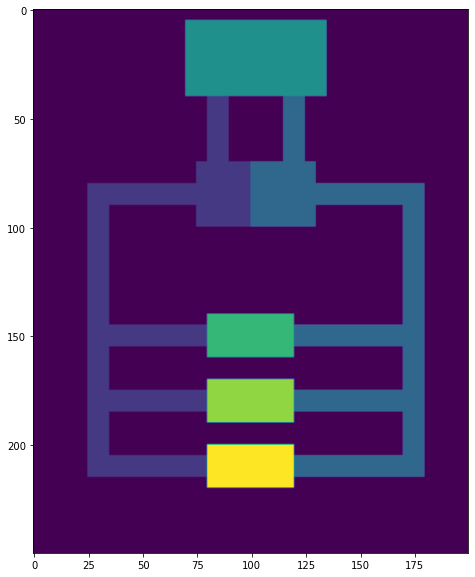

In [2]:
board = np.zeros(shape = (250,200)) # Initializing a 250 by 200 size board of color purple

# heart
board[70:100,75:100] = 1 # left part of the heart (low oxygen; blue)
board[70:100,100:130] = 2 # right part of the heart (high oxygen; teal; anatomically bigger than the left part)

# lung 
board[5:40,70:135] = 3

# organ no.1 
board[140:160,80:120] = 4

# organ no.2
board[170:190,80:120] = 5

# organ no.3
board[200:220,80:120] = 6

# veins; blue
board[40:70,80:90] = 1 # vein connecting lung and left part of the heart
board[80:90,25:75] = 1 # top vein connecting lung with organs
board[90:215,25:35] = 1 # side vein connecting lung with organs
board[145:155,35:80] = 1 # side vein organ no.1
board[175:185,35:80] = 1 # side vein organ no.2
board[205:215,35:80] = 1 # side vein organ no.3

# arteries; teal
board[40:70,115:125] = 2 # artery connecting lung and right part of the heart
board[80:90,130:180] = 2 # top artery connecting lung with organs
board[90:215,170:180] = 2 # side artery connecting lung with organs
board[145:155,120:170] = 2 # side artery organ no.1
board[175:185,120:170] = 2 # side artery organ no.2
board[205:215,120:170] = 2 # side artery organ no.3

# plotting the board
plt.figure(figsize=(20,10))
plt.imshow(board)


In [25]:
class blood_cell():
    '''
    This is the blood cells class and it allows the blood cells to move around as well as absorb oxygen and carbon dioxide.
    '''
    
    def __init__(self, dims, shape='round', color = 'red'): #We could change the shape attribute to an oxygen capacity attribute
        self.shape = shape
        #self.molecule = molecule
        self.coords = dims 
        self.dims = random.sample(dims, 1)
        self.x = self.dims[0][0]
        self.y = self.dims[0][1]
        
        if self.shape == 'round':
            oxygen_cap = 6
            carbon_cap = 5
        elif self.shape == 'sickle':
            oxygen_cap = 3
            carbon_cap = 2
        
        self.oxygen_cap = oxygen_cap
        self.carbon_cap = carbon_cap
        
        self.color = color 
        
        b_x = self.x 
        b_y = self.y
        
    def transfer(self):
        # Determine if blood cell is in lungs using nearest neighbor, if it is then it picks up the maximum amount of oxygen and releases
        # CO2
      
        # Determine if blood cell is in an organ using nearest neighbor, if it is then it picks up the max amount of CO2 and releases
        # oxygen
        #neighbors = getNeighborValues(self.x_dim, self.y_dim, board)
        if 70 < self.x < 135 and 5 < self.y < 40:
            #ox_supply = self.oxygen_cap
            #carb_supply = 0
            color = 'red'
            self.color = color
            
        elif 80 < self.x < 120 and ((140 < self.y < 160) or (170 < self.y < 190 ) or (200 < self.y < 220)):
            #ox_supply = 0
            #carb_supply = self.carbon_cap
            color = 'blue'
            self.color = color
        
    def draw(self):
         
        plt.scatter(self.x, self.y, c=self.color)

    
    def movement_up(self):
        
        '''
        Oxygen moves through the arteries towards the heart and the lung
        This is shown through the oxygen object moving 1 unit upwards
        '''
        b_dy = 1
        
        b_x = self.x 
        b_y = self.y - b_dy 
        
        self.x = b_x #oxygen coordinates update after it moves 
        self.y = b_y   
        
    def movement_down(self):
        
        '''
        Oxygen moves through the arteries towards organs
        This is shown through the oxygen object moving 1 unit downwards
        '''
        b_dy = 1
        
        b_x = self.x 
        b_y = self.y + b_dy 
        
        self.x = b_x #oxygen coordinates update after it moves 
        self.y = b_y
        
    def movement_right(self):
        
        '''
        Oxygen moves through the arteries towards organs  
        This is shown through the oxygen object moving 1 unit to the right 
        '''
        
        b_dx = 1 
        
        b_x = self.x + b_dx
        b_y = self.y 
        
        self.x = b_x #oxygen coordinates update after it moves 
        self.y = b_y      
        
    def movement_left(self):
        
        '''
        Oxygen moves through the arteries towards organs 
        This is shown through the oxygen object moving 1 unit to the left 
        '''
        
        b_dx = 1
        
        b_x = self.x - b_dx
        b_y = self.y 
        
        self.x = b_x #oxygen coordinates update after it moves 
        self.y = b_y
        
    def board_location(self):
        
        '''
        Provides the current location of the oxygen object on the board
        '''
        
        return self.x, self.y
    
    
def blood_cell_simulation(cells):
    '''
    Blood Cell Object Movement
    '''
#     b = blood_cell(self.coords)

    fig, ax = plt.subplots(figsize=(10,5))
#     color = 'red'
    for _ in range(10000):
        
        for b in cells:
    
            location = b.board_location()
    
            # change color when enter organs
            #if location[0] == 100 and location[1] == 150:
              #  color = 'blue'
            #if location[0] == 100 and location[1] == 180:
               # color = 'blue'
            #if location[0] == 100 and location[1] == 210:
                #color = 'blue'
    
            # change color when enter lung
            #if location[1] == 20:
             #   color = 'red'
                
            # movement conditions based on coordinates
            if location[1] < 85 and location[0] > 150:
                b.movement_down()
                b.transfer()
                b.draw()
        
            elif (30 <= location[0] < 85) and location[1] <= 85: 
                b.movement_right()
                b.transfer()
                b.draw()
        
            elif location[1] == 20 and location[0] == 85:
                b.movement_right()
                b.transfer()
                b.draw()
        
            elif 20 <= location[1] <=30 and location[0] >= 85 and location[0] != 120:
                b.movement_right()
                b.transfer()
                b.draw()
        
            elif location[1] <= 40 and location[0] == 120:
                b.movement_down()
                b.transfer()
                b.draw()
        
            elif location[0] == 85 and location[1] <= 85:
                b.movement_up()
                b.transfer()
                b.draw()
   
            elif location[0] == 30:
                b.movement_up()
                b.transfer()
                b.draw()

            elif location[0] < 175 and location[1] == 85:
                b.movement_right()
                b.transfer()
                b.draw()
                
            elif location[0] == 175 and location[1] < 150: 
                b.movement_down()
                b.transfer()
                b.draw()
            
            elif location[0] == 175 and location[1] == 150: #Potentially enter organ 1
                prob = random.random()
                if prob > 0.33:
                    b.movement_down()
                    b.transfer()
                    b.draw()
                else:
                    b.movement_left()
                    b.transfer()
                    b.draw()
                
            elif location[0] == 30 and location[1] == 150:
                b.movement_up()
                b.transfer()
                b.draw()
            
            elif location[1] == 150:
                b.movement_left()
                b.transfer()
                b.draw()  
        
            elif 40 < location[1] < 180: #Potentially enter organ 2 
                b.movement_down()
                b.transfer()
                b.draw()
        
            elif location[0] == 175 and location[1] == 180:
                prob = random.random()
                if prob > 0.33:
                    b.movement_down()
                    b.transfer()
                    b.draw()
                else:
                    b.movement_left()
                    b.transfer()
                    b.draw()
                    
            elif location[0] == 30 and location[1] == 180:
                b.movement_up()
                b.transfer()
                b.draw()

            elif location[1] == 180:
                b.movement_left()
                b.transfer()
                b.draw()  
    
            elif 40 < location[1] < 210: #Potentially enter organ 3 
                b.movement_down()
                b.transfer()
                b.draw()

            elif location[0] == 30 and location[1] == 210:
                b.movement_up()
                b.transfer()
                b.draw()

            elif location[1] == 210:
                b.movement_left()
                b.transfer()
                b.draw()  
    
    
        # Animaiton part (dosn't change)
        plt.imshow(board)
        clear_output(wait=True) # Clear output for dynamic display
        display(fig)            # Reset display
        fig.clear()             # Prevent overlapping and layered plots
        time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up
        # Sleep for a fraction of a second to allow animation to catch up
        
        
        

KeyboardInterrupt: 

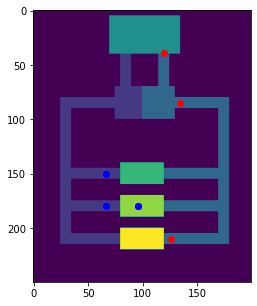

In [26]:
# Running the simulation of a red blood cell
coords = [[100,25], [100,150], [100,180], [100,210]]
cellies = ['a', 'b', 'c', 'd']
cells = [blood_cell(coords) for x in range(10)]

blood_cell_simulation(cells)

# for i in range(4):
#     cells[i].blood_cell_simulation()
# #b = blood_cell(dims=coords)
# #b.blood_cell_simulation()

In [15]:
a_thing = [[32,4], [67,22], [90,7]]
new_thing = random.sample(a_thing, 1)
new_thing[0][1]

7